# <b>Customer Segmentation Using RFM Analysis</b>

In [1]:
# Importing libraries 
import os
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

In [2]:
# Visualization style
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [3]:
# DATA PATH
FILE_PATH = os.path.join("..","datasets","raw","Superstore.csv")

In [4]:
# Importing dataset
data = pd.read_csv(FILE_PATH, index_col='Row ID', parse_dates=['Order Date','Ship Date'], encoding='windows-1252')

In [5]:
# Data sample
data.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
5279,CA-2014-159681,2014-12-07,2014-12-13,Standard Class,PO-18850,Patrick O'Brill,Consumer,United States,Virginia Beach,Virginia,23464,South,OFF-PA-10003641,Office Supplies,Paper,Xerox 1909,105.520,4,0.0,48.5392
5246,CA-2016-156265,2016-08-02,2016-08-04,Second Class,BF-11020,Barry Französisch,Corporate,United States,Los Angeles,California,90032,West,TEC-PH-10001918,Technology,Phones,Nortel Business Series Terminal T7208 Digital ...,333.576,3,0.2,33.3576
9482,CA-2017-150504,2017-11-06,2017-11-12,Standard Class,HG-14845,Harry Greene,Consumer,United States,Dallas,Texas,75220,Central,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",18.160,2,0.2,1.8160
6644,US-2015-156496,2015-08-10,2015-08-16,Standard Class,WB-21850,William Brown,Consumer,United States,Redmond,Oregon,97756,West,TEC-PH-10000576,Technology,Phones,AT&T 1080 Corded phone,438.368,4,0.2,38.3572
7150,CA-2015-166583,2015-06-26,2015-06-30,Standard Class,VD-21670,Valerie Dominguez,Consumer,United States,Houston,Texas,77070,Central,TEC-PH-10001578,Technology,Phones,Polycom SoundStation2 EX Conference phone,971.880,3,0.2,109.3365


In [6]:
data.shape

(9994, 20)

In [7]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [9]:
# Data description
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
print('='*64)
print('The data corresponds from {} to {}'.format(data['Order Date'].min(),
                                             data['Order Date'].max()))
print('='*64)

The data corresponds from 2014-01-03 00:00:00 to 2017-12-30 00:00:00


## RFM Features

In [11]:
# CREATING RFM FEATURES
# =============================================================================================

# Fecha más reciente 
snapshot_date = data['Order Date'].max() + dt.timedelta(days=1)

# Aggregate data on a customer level
datamart = data.groupby('Customer ID').agg({'Order Date': lambda x: (snapshot_date - x.max()).days,
                                          'Order ID': 'count',
                                          'Profit': 'sum'})

# Rename columns
datamart.rename(columns={'Order Date': 'Recency',
                        'Order ID': 'Frequency',
                        'Profit': 'MonetaryValue'}, inplace=True)

datamart.sample(5)

,Recency,Frequency,MonetaryValue
Customer ID,,,
LD-16855,553,1,0.4641
MC-18100,42,19,-64.1668
DJ-13420,638,5,483.0350
AS-10135,42,3,21.8496
BD-11500,36,10,1142.1225


### Export RFM Dataset

In [12]:
datamart.to_csv('../datasets/processed/rfm_dataset.csv')

### RFM segments and scores

In [13]:
# Recency quartiles
r_quartiles = pd.qcut(datamart.Recency, 5, labels=range(5, 0, -1))
datamart = datamart.assign(R = r_quartiles.values)

# Frequency quartiles
f_quartiles = pd.qcut(datamart.Frequency, 5, labels=range(1, 6))
datamart = datamart.assign(F = f_quartiles.values)

# Monetary value quartiles
m_quartiles = pd.qcut(datamart.MonetaryValue, 5, labels=range(1, 6))
datamart = datamart.assign(M = m_quartiles.values)

# Building RFM segments
def rfm_segmentation(x):
    return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))

# Create segment label
datamart['RFM_Segment'] = datamart.apply(rfm_segmentation, axis=1)

# RFM Score - Sum of scores
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

datamart.sample(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
AC-10660,283,6,-28.7004,1,1,1,111,3
KE-16420,27,15,397.8799,5,4,4,544,13
BF-11170,17,27,1538.2127,5,5,5,555,15
SH-20395,24,15,-144.5229,5,4,1,541,10
KS-16300,296,4,0.1110,1,1,1,111,3
PM-19135,52,7,526.7537,4,1,4,414,9
BC-11125,203,18,251.5974,2,4,3,243,9
AC-10450,12,9,1366.0098,5,2,5,525,12
CK-12205,40,32,141.2831,4,5,2,452,11


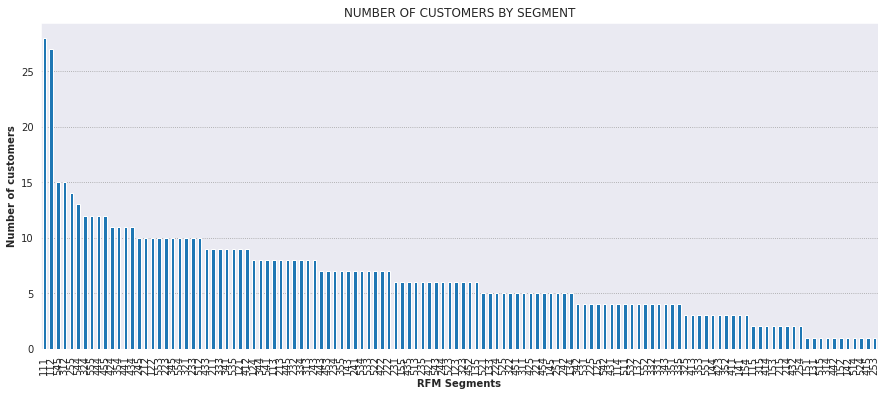

In [14]:
# Number of customers by RFM Segment
segments = datamart['RFM_Segment'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.title('NUMBER OF CUSTOMERS BY SEGMENT')
segments.plot(kind='bar')
plt.xlabel('RFM Segments', fontweight='bold')
plt.ylabel('Number of customers', fontweight='bold')
plt.grid(axis='x')
plt.show()

In [15]:
# Data by RFM score
datamart.groupby('RFM_Score').agg({'Recency': 'mean',
                                  'Frequency': 'mean',
                                  'MonetaryValue': 'mean'}).round(1)

,Recency,Frequency,MonetaryValue
RFM_Score,,,
3,464.9,4.9,-155.3
4,453.4,5.4,-36.9
5,271.3,6.9,-86.1
6,203.1,8.0,-96.2
7,177.3,9.3,76.0
8,132.7,11.4,78.0
9,119.3,12.3,270.1
10,91.0,13.7,391.5
11,81.6,15.9,689.3


## Customers Segment Labeling

In [16]:
# Labeling segments
def segment_label(df):
    if df['RFM_Score'] >= 14:
        return 'Gold'
    elif (df['RFM_Score'] >= 10) and (df['RFM_Score'] < 14):
        return 'Silver'
    else:
        return 'Bronze'
    
# Assigning segment labels    
datamart['SegmentLabel'] = datamart.apply(segment_label, axis=1)

datamart.sample(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,SegmentLabel
Customer ID,,,,,,,,,
CM-12655,28,10,1572.4585,4,2,5,425,11,Silver
JW-15955,6,11,-29.5759,5,3,1,531,9,Bronze
AS-10240,193,13,33.7158,2,3,2,232,7,Bronze
TB-21250,350,19,260.6155,1,5,3,153,9,Bronze
DF-13135,701,6,-259.3097,1,1,1,111,3,Bronze
HZ-14950,36,6,-130.3879,4,1,1,411,6,Bronze
NS-18505,7,15,-12.3040,5,4,1,541,10,Silver
JF-15190,66,19,575.1259,3,5,4,354,12,Silver
CD-11920,41,9,426.6610,4,2,4,424,10,Silver


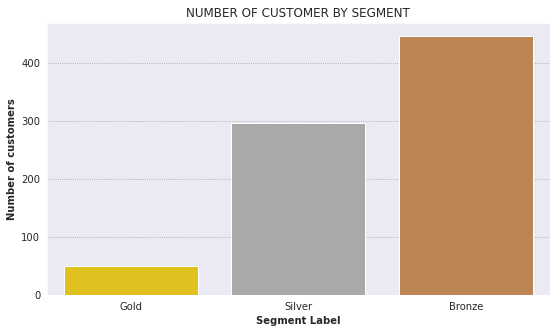

In [20]:
# Visualization of number of customers by segment label
plt.figure(figsize=(9,5))
plt.title('NUMBER OF CUSTOMER BY SEGMENT')
sns.countplot(x=datamart.SegmentLabel, order=['Gold','Silver','Bronze'], palette=['gold','darkgrey','peru'])
plt.xlabel('Segment Label', fontweight='bold')
plt.ylabel('Number of customers',fontweight='bold')
plt.savefig(os.path.join('..','img','segment_dist.png'))
plt.show()

## Datos Etiquetados

In [18]:
data_labeled = data[['Customer ID','Customer Name', 'Segment','Region',]].copy()
data_labeled.drop_duplicates('Customer ID', inplace=True)
data_labeled = data_labeled.merge(datamart['SegmentLabel'], on='Customer ID')
data_labeled.to_csv(os.path.join('..','datasets','processed', 'final_dataframe.csv'))
data_labeled

,Customer ID,Customer Name,Segment,Region,SegmentLabel
0,CG-12520,Claire Gute,Consumer,South,Bronze
1,DV-13045,Darrin Van Huff,Corporate,West,Bronze
2,SO-20335,Sean O'Donnell,Consumer,South,Bronze
3,BH-11710,Brosina Hoffman,Consumer,West,Gold
4,AA-10480,Andrew Allen,Consumer,South,Bronze
...,...,...,...,...,...
788,CJ-11875,Carl Jackson,Corporate,East,Bronze
789,RS-19870,Roy Skaria,Home Office,Central,Bronze
790,SC-20845,Sung Chung,Consumer,Central,Bronze
791,RE-19405,Ricardo Emerson,Consumer,East,Bronze
